# Redukcja wymiarowości

*Dimensionality reduction*

## SVD


Interpretacja geometryczna mnożenia macierzy

In [1]:
def plot_transform_xa(x,a):
    """
    wizualizacja mnozenia macierzy a * x
    """
    
    print(a)
    y = np.dot(x,a)
    
    plt.figure(figsize=(15,3.4))
    
    plt.subplot(1,4,1)
    
    plt.scatter(x[:,0],x[:,1])
    plt.xlim(-21,21)
    plt.ylim(-21,21)

    plt.subplot(1,4,2)
    plt.scatter(y[:,0],y[:,1])
    plt.xlim(-21,21)
    plt.ylim(-21,21)

    plt.subplot(1,4,3)
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    plt.arrow(0, 0, 0, 1, head_width=0.2, head_length=0.2, fc='red', ec='red')
    plt.arrow(0, 0, 1, 0, head_width=0.2, head_length=0.2, fc='red', ec='red')
 
    plt.subplot(1,4,4)
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    
    plt.arrow(0, 0, a[0,0],a[0,1], head_width=0.2, head_length=0.2, fc='red', ec='red')
    plt.arrow(0, 0, a[1,0],a[1,1], head_width=0.2, head_length=0.2, fc='red', ec='red')
    
    plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = np.array([[0, 0],
             [0, 1],
             [0, 2],
             [0, 3],
             [0, 4],
             [0, 5],
             [0.5, 5],
             [1, 5]])
print(x)

[[0.  0. ]
 [0.  1. ]
 [0.  2. ]
 [0.  3. ]
 [0.  4. ]
 [0.  5. ]
 [0.5 5. ]
 [1.  5. ]]


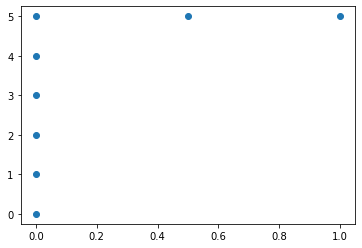

In [4]:
plt.scatter(x[:, 0], x[:, 1])

In [5]:
a = np.diag([4, 4])
a

array([[4, 0],
       [0, 4]])

[[4 0]
 [0 4]]


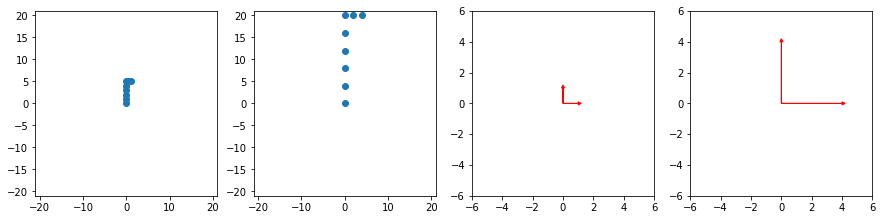

In [6]:
plot_transform_xa(x, a)

Co tu widzimy:

1) Punkty oryginalne

2) Punkty przetworzone

3) Strzałki (wektory) reprezentujące oryginalny układ odniesienia

4) Wektory reprezentujące przetworzony układ odniesienia

[[4 0]
 [0 2]]


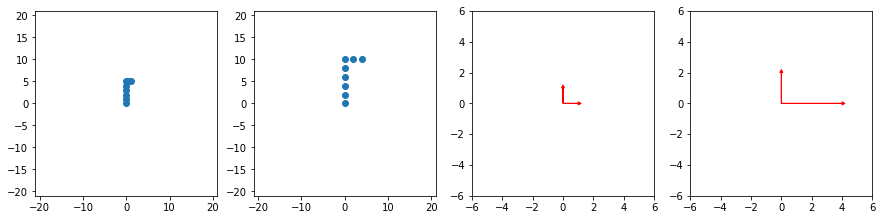

In [7]:
a = np.diag([4, 2])
plot_transform_xa(x, a)

Wniosek: Macierze diagonalne są macierzami **skalującymi**

[[ 2  3]
 [-1  3]]


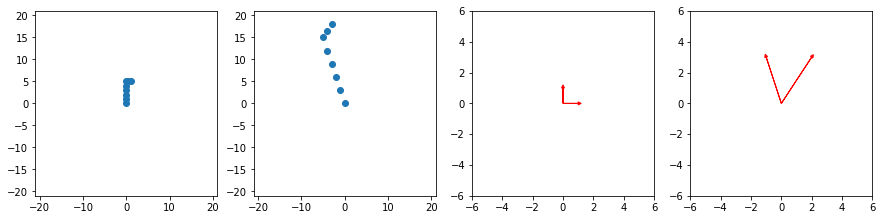

In [8]:
# dla dowlonej macierzy
a = np.array([[2, 3],
             [-1, 3]])
plot_transform_xa(x, a)

[[4 0]
 [0 0]]


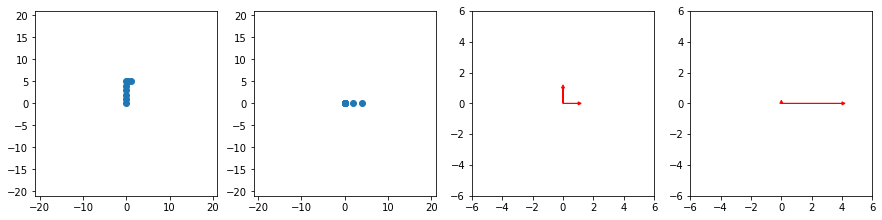

In [9]:
a = np.diag([4, 0])
plot_transform_xa(x, a)

Gdy na diagonali sa wartości zerowe, w praktyce robimy **rzutowanie na podprzetrzeń** - czyli zredukowaliśmy wynmiarowość danych z 2 do 1

[[ 0.8660254  0.5      ]
 [-0.5        0.8660254]]


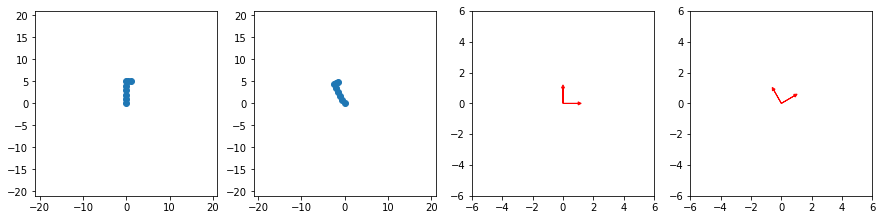

In [10]:
# macierz obrotu
t = -np.pi / 6

a = np.array([[np.cos(t), -np.sin(t)],
             [np.sin(t), np.cos(t)]])
plot_transform_xa(x, a)

Macierz obrotu musi być ortogonalna ( czyli wtedy gdy a * a' = I    oraz    det(a) = 1 )

Co się stanie po połączeniu macierzy diagonalnej z macierzą obrotu (z ich iloczynem)?

[[ 3.46410162  2.        ]
 [-1.          1.73205081]]


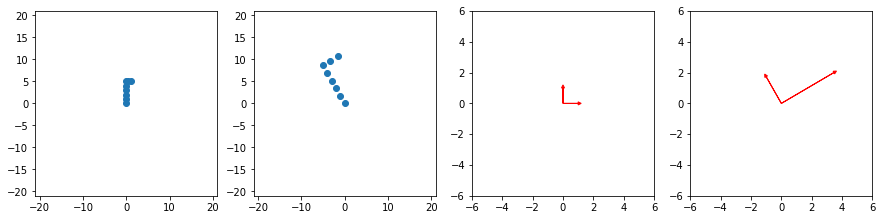

In [11]:
t = -np.pi / 6  # obrót o 30 stopni 

o = np.array([[np.cos(t), -np.sin(t)], # macierz obrotu 
             [np.sin(t), np.cos(t)]])

s = np.diag([4, 2]) # macierz diagonalna skalująca
a = np.matmul(s, o)

plot_transform_xa(x, a)

[[3.46410162 2.        ]
 [0.         0.        ]]


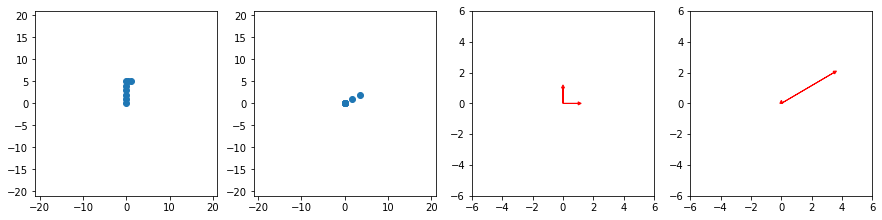

In [12]:
t = -np.pi / 6  # obrót o 30 stopni 

o = np.array([[np.cos(t), -np.sin(t)], # macierz obrotu 
             [np.sin(t), np.cos(t)]])

s = np.diag([4, 0]) # macierz diagonalna skalująca
a = np.matmul(s, o)

plot_transform_xa(x, a)

### Podsumowując:
Mnożenie wektora przez macierz to reprezetnacja tego wektora w innych układzie współrzędnych - czyli inaczej mówiąc zrzutowanie naszych punktów do nowej przestrzeni. 

# Rozkład SVD 

## X - macierz $ m\times n$

rozkładamy macierz na trzy czynniki:


## $ X = U \times \Sigma \times V^t$

, gdzie: $U: m \times m , S: m \times n, V: n \times n $

- U i V - ortogonalne o wyznacznikach 1 (są to macierze zawierające wektory osobliwe). Są to macierze obrotu.
- $\Sigma$ - macierz wartości osobliwych - $diag(\sigma_1, ..., \sigma_k)$ ,  sigmy uporządkowane malejąco. Macierz jest tego samego wymiary co X zawsze (czyli diagonalna, ale prostokątna). Jest to macierz skalująca.

<img src="Grafika/svd.jpg" width="800">

Źródło: https://www.google.pl/search?q=svd&client=ubuntu&hs=LnO&channel=fs&source=lnms&tbm=isch&sa=X&ved=0ahUKEwjI0b_Bj7HUAhUGQJoKHTXtAb8Q_AUICigB#channel=fs&tbm=isch&q=svd+decomposition&imgrc=jIHtm6dIDFPLAM:

## Interpretacja:

## $X^j = (U \Sigma V^t)^j = U \times (\Sigma V^t)^j = U \times \Sigma \times (V^t)^j$ 

czyli $j$-ta kolummna $X$ jest reprezentacją $j$-tej kolumy $(V^t)$, czyli $j$-tego wiersza $V$, gdzie

$X^j$ - cecha, którą obserwujemy, a $(V^t)^j$ to cech ukryta. 

<br>

<br>

<br>

<br>

### Analogicznie:

## $X_i = (U \Sigma V^t)_i = (U \Sigma)_i \times V^t = U_i \times \Sigma \times V^t$

#### Pytanie: po co nam to?

<br>

<br>

#### Odpowiedź:

#### Wartości elementów diagonali macierzy $\Sigma$ mówią o tym, jak ważna jest dana cecha ukryta!

Duża wartosć oznacza, że cecha jest istotna - zawiera dużo informacji. Mała - że nie jest ważna - jest szumem.


<br>

#### Zatem pomysł jest następujący: 

#### Wykorzystajmy do reprezentacji X tylko ważne cechy ukryte.

#### Przykład 1 - dwie silnie skorelowane zmienne

In [13]:
cov = np.array([[1, 0.999, 0],
               [0.999, 1, 0],
               [0, 0, 1]])

X = np.random.multivariate_normal(mean=[0, 0, 0], cov=cov, size=20)
X

array([[-0.08631124, -0.07173738,  0.21493299],
       [ 0.68546009,  0.80633186,  1.99643516],
       [-0.82397879, -0.7775148 , -0.8068176 ],
       [-0.01079102,  0.04563847,  0.83392924],
       [-1.0219841 , -1.01539747, -0.24132972],
       [ 0.07086403,  0.07404508,  1.49491792],
       [ 0.14597531,  0.19159896,  0.33998138],
       [-0.19295595, -0.21804106, -0.25346677],
       [-1.13073949, -1.12943542,  0.69369067],
       [ 0.18513309,  0.06785665,  0.46207796],
       [-0.38707499, -0.41350193, -1.76233635],
       [ 1.80274197,  1.7641946 ,  0.32385991],
       [-1.25901671, -1.31397709,  1.24599024],
       [ 0.13112663,  0.25429282,  2.54532435],
       [-0.29740121, -0.2868485 , -0.81343654],
       [-0.85102865, -0.78109528,  1.53248188],
       [ 2.34572918,  2.35487184,  0.02314253],
       [-0.474801  , -0.41361405, -1.8947967 ],
       [-0.74235831, -0.76786505, -0.71601861],
       [ 1.77277831,  1.78617838, -0.2325253 ]])

In [14]:
U, s, V = np.linalg.svd(X, full_matrices=True)

In [15]:
S = np.zeros_like(X)
np.fill_diagonal(S, s)
S

array([[6.20001469, 0.        , 0.        ],
       [0.        , 5.12120862, 0.        ],
       [0.        , 0.        , 0.16927873],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

In [16]:
U.shape, V.shape

((20, 20), (3, 3))

In [17]:
np.matmul(np.matmul(U, S), V) # Odtworzenie pierwotnego X

array([[-0.08631124, -0.07173738,  0.21493299],
       [ 0.68546009,  0.80633186,  1.99643516],
       [-0.82397879, -0.7775148 , -0.8068176 ],
       [-0.01079102,  0.04563847,  0.83392924],
       [-1.0219841 , -1.01539747, -0.24132972],
       [ 0.07086403,  0.07404508,  1.49491792],
       [ 0.14597531,  0.19159896,  0.33998138],
       [-0.19295595, -0.21804106, -0.25346677],
       [-1.13073949, -1.12943542,  0.69369067],
       [ 0.18513309,  0.06785665,  0.46207796],
       [-0.38707499, -0.41350193, -1.76233635],
       [ 1.80274197,  1.7641946 ,  0.32385991],
       [-1.25901671, -1.31397709,  1.24599024],
       [ 0.13112663,  0.25429282,  2.54532435],
       [-0.29740121, -0.2868485 , -0.81343654],
       [-0.85102865, -0.78109528,  1.53248188],
       [ 2.34572918,  2.35487184,  0.02314253],
       [-0.474801  , -0.41361405, -1.8947967 ],
       [-0.74235831, -0.76786505, -0.71601861],
       [ 1.77277831,  1.78617838, -0.2325253 ]])

In [18]:
X

array([[-0.08631124, -0.07173738,  0.21493299],
       [ 0.68546009,  0.80633186,  1.99643516],
       [-0.82397879, -0.7775148 , -0.8068176 ],
       [-0.01079102,  0.04563847,  0.83392924],
       [-1.0219841 , -1.01539747, -0.24132972],
       [ 0.07086403,  0.07404508,  1.49491792],
       [ 0.14597531,  0.19159896,  0.33998138],
       [-0.19295595, -0.21804106, -0.25346677],
       [-1.13073949, -1.12943542,  0.69369067],
       [ 0.18513309,  0.06785665,  0.46207796],
       [-0.38707499, -0.41350193, -1.76233635],
       [ 1.80274197,  1.7641946 ,  0.32385991],
       [-1.25901671, -1.31397709,  1.24599024],
       [ 0.13112663,  0.25429282,  2.54532435],
       [-0.29740121, -0.2868485 , -0.81343654],
       [-0.85102865, -0.78109528,  1.53248188],
       [ 2.34572918,  2.35487184,  0.02314253],
       [-0.474801  , -0.41361405, -1.8947967 ],
       [-0.74235831, -0.76786505, -0.71601861],
       [ 1.77277831,  1.78617838, -0.2325253 ]])

Przeanalizujmy wartości na diagonali

In [19]:
S # widzimy, że ostatnia wartość znacznie odstaje od pozostałych, więc ją zerujemy jako nieistotną

array([[6.20001469, 0.        , 0.        ],
       [0.        , 5.12120862, 0.        ],
       [0.        , 0.        , 0.16927873],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

In [20]:
S[2, 2] = 0 
S

array([[6.20001469, 0.        , 0.        ],
       [0.        , 5.12120862, 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

In [21]:
np.matmul(np.matmul(U, S), V) # Odtworzenie przybliżonego X

array([[-0.08098355, -0.07705993,  0.21503205],
       [ 0.72697914,  0.76485295,  1.99720713],
       [-0.7928456 , -0.80861789, -0.80623874],
       [ 0.00966522,  0.02520201,  0.83430958],
       [-1.0159516 , -1.02142413, -0.24121755],
       [ 0.05851136,  0.08638581,  1.49468824],
       [ 0.16554938,  0.17204381,  0.34034532],
       [-0.20304474, -0.20796203, -0.25365435],
       [-1.13599458, -1.12418541,  0.69359296],
       [ 0.12211632,  0.13081249,  0.46090628],
       [-0.38370221, -0.41687144, -1.76227364],
       [ 1.77958629,  1.78732789,  0.32342937],
       [-1.29747565, -1.27555533,  1.24527517],
       [ 0.16895404,  0.21650198,  2.54602768],
       [-0.28441371, -0.29982343, -0.81319506],
       [-0.82991444, -0.80218908,  1.53287446],
       [ 2.34894954,  2.35165459,  0.0232024 ],
       [-0.42635403, -0.46201418, -1.89389592],
       [-0.74808852, -0.76214039, -0.71612515],
       [ 1.78078292,  1.77818151, -0.23237647]])

In [22]:
X

array([[-0.08631124, -0.07173738,  0.21493299],
       [ 0.68546009,  0.80633186,  1.99643516],
       [-0.82397879, -0.7775148 , -0.8068176 ],
       [-0.01079102,  0.04563847,  0.83392924],
       [-1.0219841 , -1.01539747, -0.24132972],
       [ 0.07086403,  0.07404508,  1.49491792],
       [ 0.14597531,  0.19159896,  0.33998138],
       [-0.19295595, -0.21804106, -0.25346677],
       [-1.13073949, -1.12943542,  0.69369067],
       [ 0.18513309,  0.06785665,  0.46207796],
       [-0.38707499, -0.41350193, -1.76233635],
       [ 1.80274197,  1.7641946 ,  0.32385991],
       [-1.25901671, -1.31397709,  1.24599024],
       [ 0.13112663,  0.25429282,  2.54532435],
       [-0.29740121, -0.2868485 , -0.81343654],
       [-0.85102865, -0.78109528,  1.53248188],
       [ 2.34572918,  2.35487184,  0.02314253],
       [-0.474801  , -0.41361405, -1.8947967 ],
       [-0.74235831, -0.76786505, -0.71601861],
       [ 1.77277831,  1.78617838, -0.2325253 ]])

In [23]:
np.matmul(np.matmul(U[:, :2], S[:2, :2]), V[:2, :]) # Odtworzenie przybliżonego X w optymalny sposób

array([[-0.08098355, -0.07705993,  0.21503205],
       [ 0.72697914,  0.76485295,  1.99720713],
       [-0.7928456 , -0.80861789, -0.80623874],
       [ 0.00966522,  0.02520201,  0.83430958],
       [-1.0159516 , -1.02142413, -0.24121755],
       [ 0.05851136,  0.08638581,  1.49468824],
       [ 0.16554938,  0.17204381,  0.34034532],
       [-0.20304474, -0.20796203, -0.25365435],
       [-1.13599458, -1.12418541,  0.69359296],
       [ 0.12211632,  0.13081249,  0.46090628],
       [-0.38370221, -0.41687144, -1.76227364],
       [ 1.77958629,  1.78732789,  0.32342937],
       [-1.29747565, -1.27555533,  1.24527517],
       [ 0.16895404,  0.21650198,  2.54602768],
       [-0.28441371, -0.29982343, -0.81319506],
       [-0.82991444, -0.80218908,  1.53287446],
       [ 2.34894954,  2.35165459,  0.0232024 ],
       [-0.42635403, -0.46201418, -1.89389592],
       [-0.74808852, -0.76214039, -0.71612515],
       [ 1.78078292,  1.77818151, -0.23237647]])

#### Przykład 2 - zmienne liniowo zależne

In [24]:
a = np.arange(1, 301).reshape((50, 6))
a # orygunalne informacje

array([[  1,   2,   3,   4,   5,   6],
       [  7,   8,   9,  10,  11,  12],
       [ 13,  14,  15,  16,  17,  18],
       [ 19,  20,  21,  22,  23,  24],
       [ 25,  26,  27,  28,  29,  30],
       [ 31,  32,  33,  34,  35,  36],
       [ 37,  38,  39,  40,  41,  42],
       [ 43,  44,  45,  46,  47,  48],
       [ 49,  50,  51,  52,  53,  54],
       [ 55,  56,  57,  58,  59,  60],
       [ 61,  62,  63,  64,  65,  66],
       [ 67,  68,  69,  70,  71,  72],
       [ 73,  74,  75,  76,  77,  78],
       [ 79,  80,  81,  82,  83,  84],
       [ 85,  86,  87,  88,  89,  90],
       [ 91,  92,  93,  94,  95,  96],
       [ 97,  98,  99, 100, 101, 102],
       [103, 104, 105, 106, 107, 108],
       [109, 110, 111, 112, 113, 114],
       [115, 116, 117, 118, 119, 120],
       [121, 122, 123, 124, 125, 126],
       [127, 128, 129, 130, 131, 132],
       [133, 134, 135, 136, 137, 138],
       [139, 140, 141, 142, 143, 144],
       [145, 146, 147, 148, 149, 150],
       [151, 152, 153, 15

In [25]:
b = np.random.multivariate_normal([0]*15, np.diag([0.1]*15), 6)
# losujemy macierz współczynników liniowych do stwrozenie 15 liniowych kobinacji oryginalnych danych
b

array([[-0.35976081,  0.06042359,  0.15077969, -0.1867903 , -0.23036902,
         0.75846457, -0.04294877, -0.0378691 ,  0.13035586, -0.39514036,
        -0.52595572, -0.30017688,  0.34556581,  0.26939346, -0.04536643],
       [-0.17949665, -0.08840658,  0.55309856, -0.14171222,  0.14312949,
        -0.04072831,  0.0476425 , -0.05835768, -0.11424435, -0.02850215,
         0.05813288,  0.08827784,  0.00157578, -0.29864412, -0.04567059],
       [-0.10717777,  0.06628363,  0.50409576,  0.67222325, -0.21531952,
         0.16084224, -0.00388447,  0.16101665,  0.47175002, -0.60943323,
        -0.13319816, -0.01790861, -0.35784367, -0.48932988,  0.04444195],
       [ 0.02561905, -0.16956901,  0.13047096,  0.21694845,  0.31642116,
        -0.06996345, -0.02931461, -0.27328252,  0.30608439, -0.3020967 ,
        -0.29703466, -0.29379248,  0.23947192,  0.82290524,  0.27363419],
       [ 0.56759382,  0.37802135, -0.05099685, -0.06736662, -0.20107281,
        -0.40611719,  0.18737459,  0.00852148, 

In [26]:
x = np.matmul(a, b)
x.shape

(50, 15)

In [27]:
np.set_printoptions(2, suppress=True)

In [28]:
b

array([[-0.36,  0.06,  0.15, -0.19, -0.23,  0.76, -0.04, -0.04,  0.13,
        -0.4 , -0.53, -0.3 ,  0.35,  0.27, -0.05],
       [-0.18, -0.09,  0.55, -0.14,  0.14, -0.04,  0.05, -0.06, -0.11,
        -0.03,  0.06,  0.09,  0.  , -0.3 , -0.05],
       [-0.11,  0.07,  0.5 ,  0.67, -0.22,  0.16, -0.  ,  0.16,  0.47,
        -0.61, -0.13, -0.02, -0.36, -0.49,  0.04],
       [ 0.03, -0.17,  0.13,  0.22,  0.32, -0.07, -0.03, -0.27,  0.31,
        -0.3 , -0.3 , -0.29,  0.24,  0.82,  0.27],
       [ 0.57,  0.38, -0.05, -0.07, -0.2 , -0.41,  0.19,  0.01, -0.17,
         0.29,  0.19, -0.24, -0.28, -0.02,  0.02],
       [ 0.05,  0.02, -0.23,  0.52, -0.09,  0.05, -0.09,  0.49,  0.23,
         0.27,  0.01, -0.16, -0.23,  0.01,  0.04]])

In [29]:
U, s, V = np.linalg.svd(x)
S = np.zeros_like(x)
np.fill_diagonal(S, s)

In [30]:
s

array([2861.81,   18.78,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ])

In [31]:
x_restored = np.matmul(np.matmul(U[:, :2], S[:2, :2]), V[:2, :])

In [32]:
x_restored

array([[   2.19,    1.41,    1.63,    5.17,   -0.89,   -0.87,    0.3 ,
           2.2 ,    3.07,   -0.4 ,   -0.94,   -3.5 ,   -2.55,    1.46,
           1.45],
       [   2.17,    3.01,    7.95,   11.22,   -2.58,    1.82,    0.69,
           3.92,    8.18,   -5.04,   -5.09,   -9.02,   -4.23,    3.22,
           3.19],
       [   2.14,    4.6 ,   14.27,   17.27,   -4.27,    4.51,    1.09,
           5.65,   13.3 ,   -9.67,   -9.23,  -14.54,   -5.92,    4.99,
           4.93],
       [   2.11,    6.2 ,   20.59,   23.32,   -5.95,    7.2 ,    1.48,
           7.37,   18.41,  -14.3 ,  -13.37,  -20.06,   -7.61,    6.75,
           6.67],
       [   2.09,    7.8 ,   26.92,   29.37,   -7.64,    9.89,    1.88,
           9.09,   23.53,  -18.94,  -17.51,  -25.59,   -9.3 ,    8.52,
           8.41],
       [   2.06,    9.39,   33.24,   35.42,   -9.32,   12.59,    2.27,
          10.82,   28.65,  -23.57,  -21.65,  -31.11,  -10.99,   10.28,
          10.15],
       [   2.03,   10.99,   39.56,   41.

In [33]:
x

array([[   2.19,    1.41,    1.63,    5.17,   -0.89,   -0.87,    0.3 ,
           2.2 ,    3.07,   -0.4 ,   -0.94,   -3.5 ,   -2.55,    1.46,
           1.45],
       [   2.17,    3.01,    7.95,   11.22,   -2.58,    1.82,    0.69,
           3.92,    8.18,   -5.04,   -5.09,   -9.02,   -4.23,    3.22,
           3.19],
       [   2.14,    4.6 ,   14.27,   17.27,   -4.27,    4.51,    1.09,
           5.65,   13.3 ,   -9.67,   -9.23,  -14.54,   -5.92,    4.99,
           4.93],
       [   2.11,    6.2 ,   20.59,   23.32,   -5.95,    7.2 ,    1.48,
           7.37,   18.41,  -14.3 ,  -13.37,  -20.06,   -7.61,    6.75,
           6.67],
       [   2.09,    7.8 ,   26.92,   29.37,   -7.64,    9.89,    1.88,
           9.09,   23.53,  -18.94,  -17.51,  -25.59,   -9.3 ,    8.52,
           8.41],
       [   2.06,    9.39,   33.24,   35.42,   -9.32,   12.59,    2.27,
          10.82,   28.65,  -23.57,  -21.65,  -31.11,  -10.99,   10.28,
          10.15],
       [   2.03,   10.99,   39.56,   41.

Wniosek: za pomocą 2 zmiennych bezstratnie odtwrozyliśmy cały zbiór składający się z 15 zmiennych

#### Przykład 3 - zmienne niezależne z dodanym szumem

In [34]:
a = np.random.multivariate_normal(mean=[0]*6, cov=np.diag([0.1]*6), size=100)
b = np.random.multivariate_normal([0]*15, np.diag([0.4]*15), 6)
noise = np.random.multivariate_normal([0]*15, np.diag([0.01]*15), 100)
X = np.matmul(a, b) + noise
X.shape

(100, 15)

In [35]:
U, s, V = np.linalg.svd(X)
S = np.zeros_like(X)
np.fill_diagonal(S, s)

<BarContainer object of 15 artists>

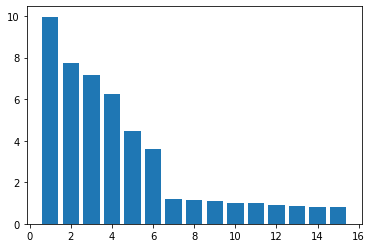

In [36]:
plt.bar(range(1, len(s)+1), s)

<BarContainer object of 15 artists>

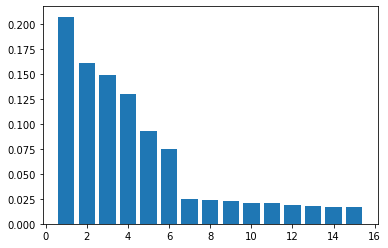

In [37]:
s_norm = s / sum(s)
plt.bar(range(1, len(s_norm)+1), s_norm)

<BarContainer object of 15 artists>

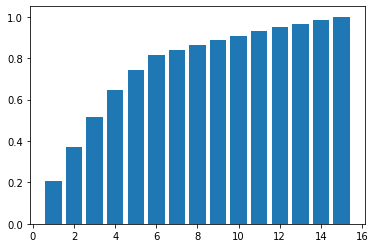

In [38]:
plt.bar(range(1, len(s_norm)+1), np.cumsum(s_norm))

Obserwujmy wyraźne odcięcie 6 pierwszysch zmiennych od reszty (nieskopresowany szum). W takim przypadku bierzemy pierwsze 6 zmiennych i na ich podstawie możemy odbudować przybliżony dataset. 

Dla wartości skumulowanych widać, że dla 6 zmiennych zatrzymujemy około 80% informacji oryginalnych

In [39]:
X_restored = np.matmul(np.matmul(U[:, :6], S[:6, :6]), V[:6, :])
X_restored

array([[ 0.65, -0.29,  1.16, ...,  0.27,  0.01, -0.4 ],
       [-0.09,  0.3 , -0.46, ..., -0.44,  0.22,  0.65],
       [ 0.71,  0.01,  0.57, ...,  0.33, -0.12, -0.11],
       ...,
       [-0.13, -0.33, -0.16, ..., -0.36, -0.06, -0.06],
       [-0.27,  0.01,  0.1 , ...,  0.48,  0.29,  0.13],
       [ 0.01, -0.01, -0.13, ...,  0.8 ,  0.25,  0.27]])

In [40]:
np.matmul(a, b)

array([[ 0.56, -0.3 ,  1.13, ...,  0.19,  0.07, -0.4 ],
       [-0.05,  0.22, -0.42, ..., -0.39,  0.21,  0.64],
       [ 0.74, -0.01,  0.69, ...,  0.43, -0.07, -0.14],
       ...,
       [-0.11, -0.39, -0.14, ..., -0.41, -0.12, -0.11],
       [-0.27,  0.04,  0.08, ...,  0.55,  0.27,  0.1 ],
       [-0.05, -0.09, -0.12, ...,  0.64,  0.18,  0.11]])

In [41]:
U[:, :6]

array([[-0.2 ,  0.01, -0.06,  0.08,  0.06, -0.19],
       [ 0.1 ,  0.1 , -0.03, -0.05, -0.07,  0.04],
       [-0.14, -0.01, -0.13,  0.02, -0.03,  0.02],
       [-0.06, -0.09,  0.01, -0.04, -0.17,  0.08],
       [-0.  ,  0.02, -0.02, -0.  ,  0.02, -0.11],
       [ 0.08, -0.09, -0.04,  0.12,  0.07,  0.15],
       [-0.25, -0.1 ,  0.06,  0.11,  0.01, -0.31],
       [ 0.04, -0.28, -0.02,  0.12,  0.  ,  0.05],
       [ 0.07, -0.05,  0.14, -0.04, -0.09, -0.1 ],
       [ 0.17, -0.07, -0.09, -0.07,  0.06, -0.1 ],
       [ 0.  , -0.05,  0.05, -0.17,  0.18, -0.07],
       [-0.08,  0.07,  0.05,  0.23, -0.04, -0.04],
       [-0.18, -0.05,  0.05, -0.03, -0.21, -0.18],
       [-0.13, -0.04, -0.03, -0.19,  0.07,  0.08],
       [ 0.05, -0.  , -0.02, -0.06, -0.11,  0.08],
       [-0.07, -0.09,  0.08, -0.03,  0.05,  0.1 ],
       [-0.02, -0.  , -0.05,  0.2 , -0.17, -0.02],
       [-0.01,  0.09,  0.13, -0.08, -0.03,  0.04],
       [-0.12, -0.22,  0.13, -0.08,  0.05,  0.01],
       [-0.08,  0.13,  0.16,  0

# Przetwarzanie obrazu

http://www.ams.org/samplings/feature-column/fcarc-svd

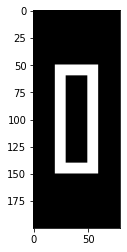

In [42]:
x = np.zeros((200, 80))
x[50:150, 20:60] = 1
x[60:140, 30:50] = 0
plt.imshow(x, cmap='gray')

In [43]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
# zaszumiamy obraz

# losujemy indeksy pixeli
random_indices = np.random.choice([0, 1], size=x.shape).nonzero()

x[random_indices] = x[random_indices] + np.random.normal(0, 0.3, len(random_indices[0]))

# normalizacja obrazka
x[x<0] = 0
x[x>1] = 1

x

array([[0.64, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.27, 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.23, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.14, 0.  , 0.  ]])

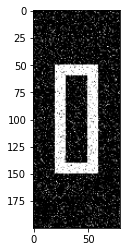

In [45]:
plt.imshow(x, cmap='gray')

### Zadanie: odszumić obrazek

In [46]:
U, s, V = np.linalg.svd(x)
S = np.zeros_like(x)
np.fill_diagonal(S, s)

<BarContainer object of 80 artists>

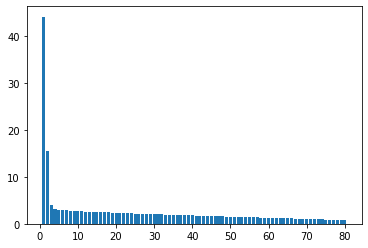

In [47]:
plt.bar(range(1, len(s)+1), s)

Zobaczmy jak będą wyglądały obrazki dla różnych ilości zmiennych ukrytych

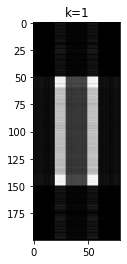

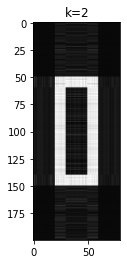

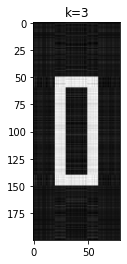

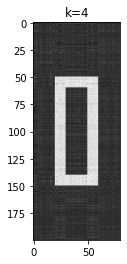

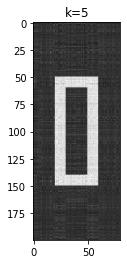

In [48]:
for k in range(1, 6):
    x_restored = np.matmul(np.matmul(U[:, :k], S[:k, :k]), V[:k, :])
    plt.figure()
    plt.imshow(x_restored, cmap='gray')
    plt.title(f"k={k}")

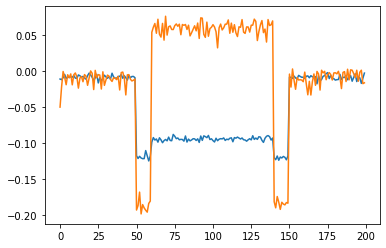

In [49]:
plt.plot(U[:, :2])

In [50]:
# dla k=3

U[:, :3].shape, V[:3, :].shape, S[:3, :3].shape

((200, 3), (3, 80), (3, 3))

In [51]:
# potrzebujemy 849 wartości w tablicach

In [52]:
x.shape

(200, 80)

In [53]:
200 * 80 / 849 # 18-krotnie zmniejszyliśmy rozmiar obrazka

18.84570082449941

### Zadanie - zredukować reprezentację obrazka kolorowego

Zadanie dodatkowe - podać ile bajtów zajmuje normalna reprezentacja, a ile reprezentacja zredukowana dobrej jakości

In [54]:
import PIL.Image as Image

In [55]:
im = Image.open('Dane/Obrazy/1.jpg')

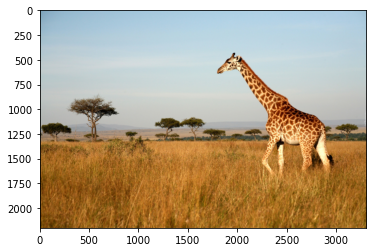

In [56]:
plt.imshow(im)

In [57]:
type(im)

PIL.JpegImagePlugin.JpegImageFile

In [58]:
im = np.array(im) / 255

In [59]:
im.shape # 3 wymiary bo kanały R G B

(2200, 3300, 3)

In [60]:
type(im)

numpy.ndarray

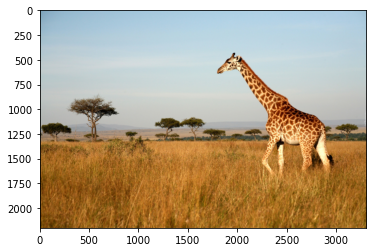

In [61]:
plt.imshow(im)

In [62]:
im_r = im[:, :, 0]
im_g = im[:, :, 1]
im_b = im[:, :, 2]

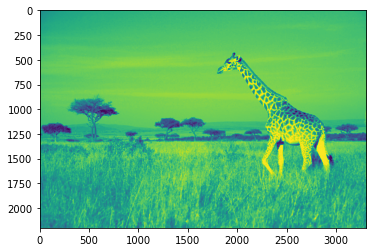

In [63]:
plt.imshow(im_r)

In [64]:
U_r, s_r, V_r = np.linalg.svd(im_r)
U_g, s_g, V_g = np.linalg.svd(im_g)
U_b, s_b, V_b = np.linalg.svd(im_b)

(-10.0, 50.0)

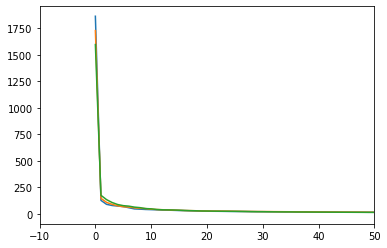

In [65]:
plt.plot(s_r)
plt.plot(s_g)
plt.plot(s_b)
plt.xlim(-10, 50)

(-10.0, 2308.95)

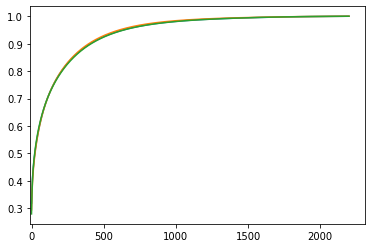

In [66]:
s_r_n = s_r / sum(s_r)
s_g_n = s_g / sum(s_g)
s_b_n = s_b / sum(s_b)


plt.plot(np.cumsum(s_r_n))
plt.plot(np.cumsum(s_g_n))
plt.plot(np.cumsum(s_b_n))
plt.xlim(-10)

In [67]:
k = 800

In [68]:
im_r_restored = np.matmul(np.matmul(U_r[:, :k], np.diag(s_r[:k])), V_r[:k, :])
im_g_restored = np.matmul(np.matmul(U_g[:, :k], np.diag(s_g[:k])), V_g[:k, :])
im_b_restored = np.matmul(np.matmul(U_b[:, :k], np.diag(s_b[:k])), V_b[:k, :])

In [69]:
im_r_restored = np.clip(im_r_restored, 0, 1)
im_g_restored = np.clip(im_g_restored, 0, 1)
im_b_restored = np.clip(im_b_restored, 0, 1)

In [70]:
im_restored = np.zeros_like(im)
im_restored.shape

(2200, 3300, 3)

In [71]:
im_restored[:, :, 0] = im_r_restored
im_restored[:, :, 1] = im_g_restored
im_restored[:, :, 2] = im_b_restored

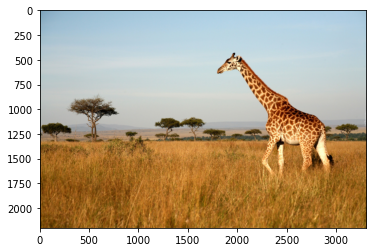

In [72]:
plt.imshow(im_restored)

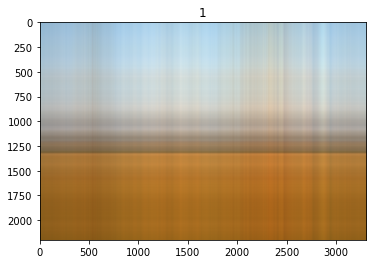

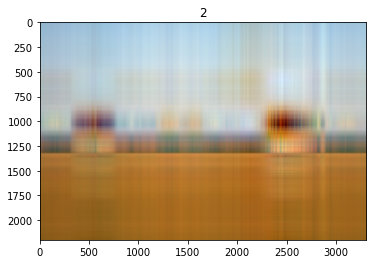

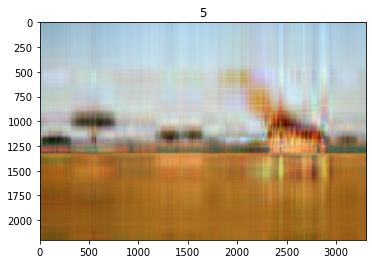

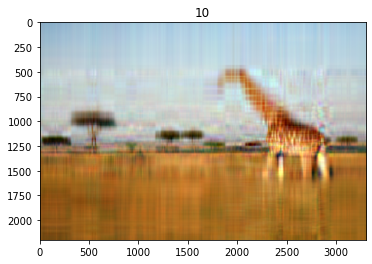

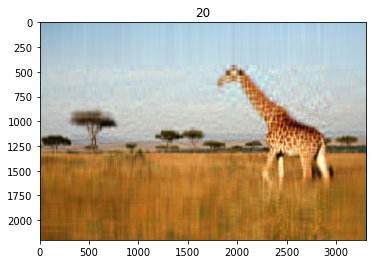

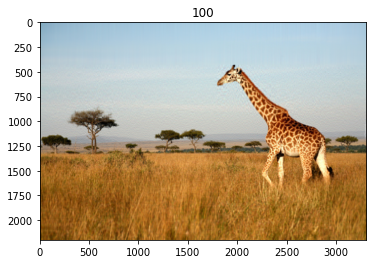

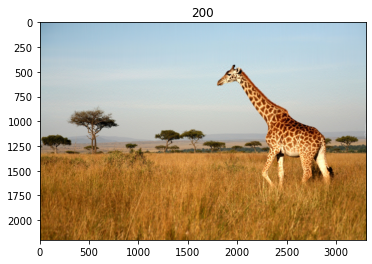

In [73]:
for k in [1, 2, 5, 10, 20, 100, 200]:
    im_r_restored = np.matmul(np.matmul(U_r[:, :k], np.diag(s_r[:k])), V_r[:k, :])
    im_g_restored = np.matmul(np.matmul(U_g[:, :k], np.diag(s_g[:k])), V_g[:k, :])
    im_b_restored = np.matmul(np.matmul(U_b[:, :k], np.diag(s_b[:k])), V_b[:k, :])
    
    im_r_restored = np.clip(im_r_restored, 0, 1)
    im_g_restored = np.clip(im_g_restored, 0, 1)
    im_b_restored = np.clip(im_b_restored, 0, 1)
    
    im_restored = np.zeros_like(im)
    im_restored[:, :, 0] = im_r_restored
    im_restored[:, :, 1] = im_g_restored
    im_restored[:, :, 2] = im_b_restored
    
    plt.figure()
    plt.imshow(im_restored)
    plt.title(k)

In [74]:
k = 800

In [75]:
3 * (U_r[:, :k].shape[0]*U_r[:, :k].shape[1]  + sum(s_r[:k].shape) + (V_r[:k, :].shape[0] * V_r[:k, :].shape[1]))

13202400

In [76]:
im.shape[0] * im.shape[1] * im.shape[2]

21780000

In [77]:
21780000 / 13202400

1.649700054535539

# Case study 

### Zaprojektować wyszukiwarkę: dla danego zapytania znaleźć tekst najbardziej adekwatny.

Podstawowy sposób reprezentacji tekstu to macierz wystąpień słów w dokumentach - oznacza to bardzo duży wymiar danych... 

Dlatego potrzebna redukcja. Pomysł: wykryć znaczenie tekstu znajdując ukryte cechy.

W praktyce rozkład SVD stosuje się w analizie podobieństwa tekstów (wyszukiwarki, systemy rekomendacyjne).

In [78]:
documents = [
    "morze plaża woda słońce piasek",
    "morze plaża piasek woda",
    "morze plaża słońce",
    "plaża woda piasek",
    "słońce woda plaża",
    "piasek woda",
    "krowa pies papuga",
    "pies kot"
]

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
dtm = cv.fit_transform(documents)

In [80]:
x = dtm.todense().A.T  # transponujemy, aby mieć słowa jako wirsze, a dokumenty jako kolumny
x

array([[0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [1, 1, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 0],
       [1, 1, 0, 1, 1, 1, 0, 0]], dtype=int64)

### Nasz cel - wyreprezentować dokumenty w niżej wymiarowej przestrzeni - znaleźć ich znaczenie.

Spojrzmy na wyglad dokumentow w powyzszej przestrzeni cech ukrytych

In [81]:
U, s, V = np.linalg.svd(x)

In [82]:
U

array([[ 0.  ,  0.28, -0.  , -0.72,  0.  ,  0.  , -0.  ,  0.45, -0.44],
       [ 0.  ,  0.45, -0.  ,  0.45, -0.  ,  0.  , -0.  ,  0.72,  0.29],
       [-0.35, -0.  , -0.34, -0.  , -0.76,  0.15,  0.39,  0.  , -0.  ],
       [ 0.  ,  0.45, -0.  ,  0.45, -0.  , -0.  , -0.  , -0.26, -0.73],
       [-0.44,  0.  ,  0.55,  0.  , -0.31,  0.23, -0.6 , -0.  ,  0.  ],
       [ 0.  ,  0.72, -0.  , -0.28,  0.  , -0.  , -0.  , -0.45,  0.44],
       [-0.55, -0.  , -0.27,  0.  ,  0.12, -0.76, -0.2 ,  0.  ,  0.  ],
       [-0.32, -0.  , -0.59,  0.  ,  0.38,  0.57, -0.28, -0.  ,  0.  ],
       [-0.53,  0.  ,  0.41,  0.  ,  0.4 ,  0.15,  0.61,  0.  , -0.  ]])

In [83]:
V

array([[-0.57, -0.48, -0.32, -0.39, -0.36, -0.25,  0.  ,  0.  ],
       [-0.  ,  0.  , -0.  , -0.  ,  0.  ,  0.  ,  0.85,  0.53],
       [-0.14,  0.19, -0.67,  0.39, -0.25,  0.53, -0.  , -0.  ],
       [-0.  , -0.  , -0.  , -0.  ,  0.  ,  0.  ,  0.53, -0.85],
       [-0.15, -0.48, -0.23,  0.2 ,  0.8 ,  0.09, -0.  ,  0.  ],
       [ 0.5 , -0.34, -0.06, -0.56, -0.05,  0.56, -0.  , -0.  ],
       [-0.24,  0.62, -0.25, -0.59,  0.4 ,  0.01, -0.  , -0.  ],
       [-0.58,  0.  ,  0.58, -0.  ,  0.  ,  0.58, -0.  ,  0.  ]])

In [84]:
s/sum(s)

array([0.36, 0.18, 0.16, 0.11, 0.1 , 0.06, 0.03, 0.  ])

In [85]:
np.cumsum(s/sum(s))

array([0.36, 0.53, 0.7 , 0.8 , 0.91, 0.97, 1.  , 1.  ])

In [86]:
k = 2 # bierzemy dwie najistotniejsze cechy ukryte ze względu na fakt, że chcemy je wyświetlić w 2D
x_n = V[:k, :] # przycięta reprezentacja naszych dokumentów
x_n

array([[-0.57, -0.48, -0.32, -0.39, -0.36, -0.25,  0.  ,  0.  ],
       [-0.  ,  0.  , -0.  , -0.  ,  0.  ,  0.  ,  0.85,  0.53]])

In [87]:
latent_vars = x_n.T
latent_vars

array([[-0.57, -0.  ],
       [-0.48,  0.  ],
       [-0.32, -0.  ],
       [-0.39, -0.  ],
       [-0.36,  0.  ],
       [-0.25,  0.  ],
       [ 0.  ,  0.85],
       [ 0.  ,  0.53]])

<ipython-input-88-daf1f7d76a69>:3: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=documents[i],


Text(0, 0.5, 'Komponent U[:, 1]')

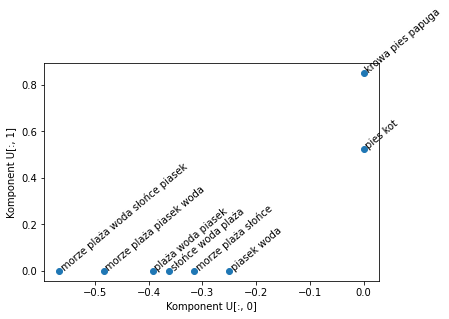

In [88]:
plt.scatter(latent_vars[:, 0], latent_vars[:, 1])
for i in range(latent_vars.shape[0]):
    plt.annotate(s=documents[i],
                xy=(latent_vars[i, 0], latent_vars[i, 1]),
                rotation=40)
    
plt.xlabel('Komponent U[:, 0]')
plt.ylabel('Komponent U[:, 1]')

In [89]:
cv.get_feature_names()

['kot',
 'krowa',
 'morze',
 'papuga',
 'piasek',
 'pies',
 'plaża',
 'słońce',
 'woda']

In [90]:
U[:, 0]

array([ 0.  ,  0.  , -0.35,  0.  , -0.44,  0.  , -0.55, -0.32, -0.53])

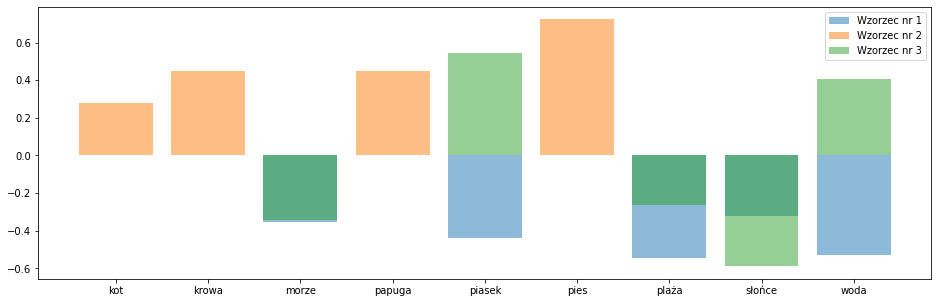

In [91]:
plt.figure(figsize=(16, 5))
plt.bar(cv.get_feature_names(), U[:, 0], label='Wzorzec nr 1', alpha=0.5)
plt.bar(cv.get_feature_names(), U[:, 1], label='Wzorzec nr 2', alpha=0.5)
plt.bar(cv.get_feature_names(), U[:, 2], label='Wzorzec nr 3', alpha=0.5)
plt.legend()

Interpretacja wzroców:

1) Słowa związane tylko z wakacjami

2) Słowa związane tylko ze zwierzętami

3) Wśród słów związanhc z wakacjami, rozróżnienie piasku u wody od reszty

In [92]:
latent_vars

array([[-0.57, -0.  ],
       [-0.48,  0.  ],
       [-0.32, -0.  ],
       [-0.39, -0.  ],
       [-0.36,  0.  ],
       [-0.25,  0.  ],
       [ 0.  ,  0.85],
       [ 0.  ,  0.53]])

### Pytanie: jak wyreprezentować przychodzące zapytanie w naszej przestrzeni V?

Spójrzmy jak otrzymać V z X mając rozkład svd:

$ X = USV \ \ $ => $ \ \ U^{-1} X = SV^t \ \ $ => $ \ \ S^{-1} U^{-1} X = V^t$ 

i wiemy, że $U^{-1} = U^t$.

Zatem co zrobić z nowym zapytanie, żeby otrzymać jego reprezentację w V? To samo co z X, czyli:

$ V^t_{nowe} = S^{-1} U^t X_{nowy}$

In [93]:
new_doc = ['morze i słońce']
new_doc = cv.transform(new_doc).todense().A.T
new_doc

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]], dtype=int64)

In [94]:
query = np.matmul(np.linalg.inv(np.diag(s[:2])), np.matmul(U[:, :2].T, new_doc)).T

In [95]:
query

array([[-0.17, -0.  ]])

<ipython-input-96-8b792eec1f27>:5: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=documents[i],


Text(0, 0.5, 'Komponent U[:, 1]')

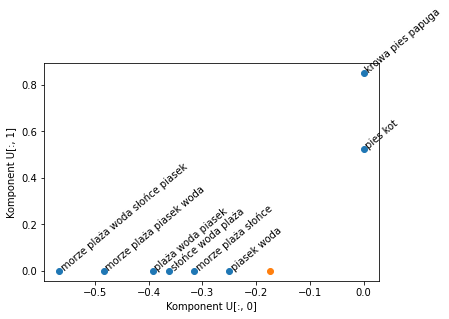

In [96]:
plt.scatter(latent_vars[:, 0], latent_vars[:, 1])
plt.scatter(query[:, 0], query[:, 1])

for i in range(latent_vars.shape[0]):
    plt.annotate(s=documents[i],
                xy=(latent_vars[i, 0], latent_vars[i, 1]),
                rotation=40)
    
plt.xlabel('Komponent U[:, 0]')
plt.ylabel('Komponent U[:, 1]')

In [97]:
latent_vars_all = V.T
latent_vars_all

array([[-0.57, -0.  , -0.14, -0.  , -0.15,  0.5 , -0.24, -0.58],
       [-0.48,  0.  ,  0.19, -0.  , -0.48, -0.34,  0.62,  0.  ],
       [-0.32, -0.  , -0.67, -0.  , -0.23, -0.06, -0.25,  0.58],
       [-0.39, -0.  ,  0.39, -0.  ,  0.2 , -0.56, -0.59, -0.  ],
       [-0.36,  0.  , -0.25,  0.  ,  0.8 , -0.05,  0.4 ,  0.  ],
       [-0.25,  0.  ,  0.53,  0.  ,  0.09,  0.56,  0.01,  0.58],
       [ 0.  ,  0.85, -0.  ,  0.53, -0.  , -0.  , -0.  , -0.  ],
       [ 0.  ,  0.53, -0.  , -0.85,  0.  , -0.  , -0.  ,  0.  ]])

In [98]:
full_query = np.matmul(np.linalg.inv(np.diag(s)), np.matmul(U[:, :len(s)].T, new_doc)).T

In [99]:
full_query

array([[-0.17, -0.  , -0.52, -0.  , -0.34,  1.06,  0.35, -2.36]])

In [100]:
from sklearn.metrics import pairwise_distances

In [101]:
distances = pairwise_distances(full_query, latent_vars_all, metric='cosine').ravel()
distances

array([0.25, 1.  , 1.38, 1.37, 1.  , 1.38, 1.  , 1.  ])

In [102]:
order = distances.argsort()
order

array([0, 4, 1, 7, 6, 3, 5, 2], dtype=int64)

In [103]:
distances[order]

array([0.25, 1.  , 1.  , 1.  , 1.  , 1.37, 1.38, 1.38])

In [104]:
np.array(documents)[order]

array(['morze plaża woda słońce piasek', 'słońce woda plaża',
       'morze plaża piasek woda', 'pies kot', 'krowa pies papuga',
       'plaża woda piasek', 'piasek woda', 'morze plaża słońce'],
      dtype='<U30')

### SVD w sklearn.

Oczywiście w sklearn istnieje gotwe narzędzie do robienia rozkładu sklearn i działa ona w konwencji sklearna - mamy gotowy obiekt, który można dopasować do danych i zrobić wszystko co potrzebujemy:

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
<br>

<br>

# PCA


<img src="Grafika/pca1.png" width="740">

<img src="Grafika/pca2.png" width="400">

Źródło: https://medium.com/@aptrishu/understanding-principle-component-analysis-e32be0253ef0

<img src="Grafika/PCA.png" width="800">

Źródło: https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/

### Uwaga na skalę zmiennych!

In [105]:
samples = np.loadtxt('Dane/seeds_dataset.txt')
data = samples[:, [3, 4]]
data

array([[5.76, 3.31],
       [5.55, 3.33],
       [5.29, 3.34],
       [5.32, 3.38],
       [5.66, 3.56],
       [5.39, 3.31],
       [5.56, 3.26],
       [5.42, 3.3 ],
       [6.05, 3.46],
       [5.88, 3.5 ],
       [5.71, 3.24],
       [5.44, 3.2 ],
       [5.44, 3.2 ],
       [5.48, 3.16],
       [5.48, 3.11],
       [5.35, 3.33],
       [5.12, 3.38],
       [5.53, 3.51],
       [5.21, 3.47],
       [5.23, 3.05],
       [5.66, 3.13],
       [5.52, 3.17],
       [5.62, 3.51],
       [5.1 , 2.94],
       [5.79, 3.25],
       [5.83, 3.42],
       [5.39, 3.03],
       [5.39, 2.96],
       [5.54, 3.22],
       [5.52, 3.06],
       [5.45, 2.98],
       [5.76, 3.37],
       [5.72, 3.19],
       [5.58, 3.15],
       [5.71, 3.33],
       [5.71, 3.48],
       [5.83, 3.46],
       [5.83, 3.68],
       [5.66, 3.29],
       [5.4 , 3.3 ],
       [5.35, 3.16],
       [5.35, 3.16],
       [5.14, 3.2 ],
       [5.88, 3.4 ],
       [5.58, 3.46],
       [5.38, 3.15],
       [5.7 , 3.39],
       [5.57,

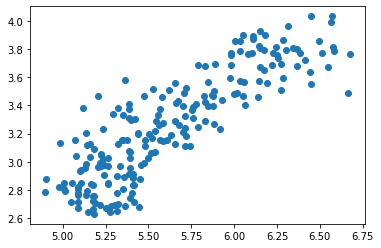

In [106]:
plt.scatter(data[:, 0], data[:, 1])

In [107]:
from scipy.stats import pearsonr

In [108]:
corr, _ = pearsonr(data[:, 0], data[:, 1])
corr

0.8604149377143466

In [109]:
from sklearn.preprocessing import scale

data = scale(data)

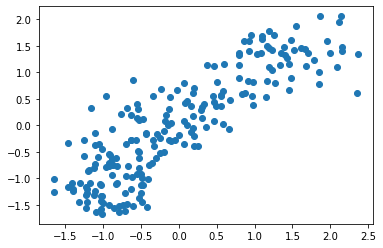

In [110]:
plt.scatter(data[:, 0], data[:, 1])

In [111]:
from sklearn.decomposition import PCA

In [112]:
model = PCA()
model.fit(data)

PCA()

In [113]:
first_component = model.components_[0, :] # komponenty składowe są wierszami
first_component

array([0.71, 0.71])

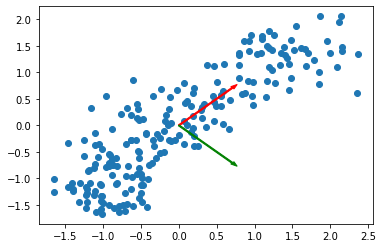

In [114]:
plt.scatter(data[:, 0], data[:, 1])
plt.arrow(0, 0, first_component[0], first_component[1], width=0.02, color='red')
plt.arrow(0, 0, model.components_[1, :][0], model.components_[1, :][1], width=0.02, color='green')

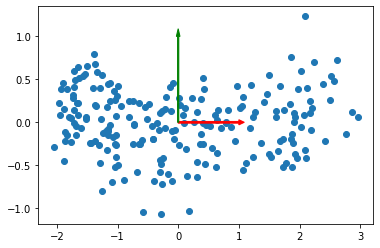

In [115]:
pca_features = model.transform(data)

plt.scatter(pca_features[:, 0], pca_features[:, 1])

plt.arrow(0, 0, 1, 0, width=0.02, color='red')
plt.arrow(0, 0, 0, 1, width=0.02, color='green')

In [116]:
corr, _ = pearsonr(pca_features[:, 0], pca_features[:, 1])
corr

-4.71736365248443e-16

In [117]:
np.var(pca_features[:, 0]), np.var(pca_features[:, 1])

(1.8604149377143464, 0.1395850622856532)

In [118]:
model.explained_variance_

array([1.87, 0.14])

In [119]:
model.explained_variance_ / np.sum(model.explained_variance_)

array([0.93, 0.07])

In [120]:
model.explained_variance_ratio_

array([0.93, 0.07])

<BarContainer object of 2 artists>

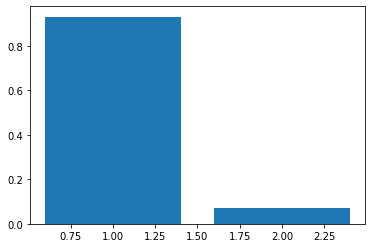

In [121]:
plt.bar(range(1, 3), model.explained_variance_ratio_)

### Zadanie. Rozważmy zbiór ryb. Ile wymiarów wystarczy, żeby je dobrze wyreprezentować?

In [122]:
import pandas as pd
samples = pd.read_csv("Dane/fish.csv", sep=";", decimal=",")

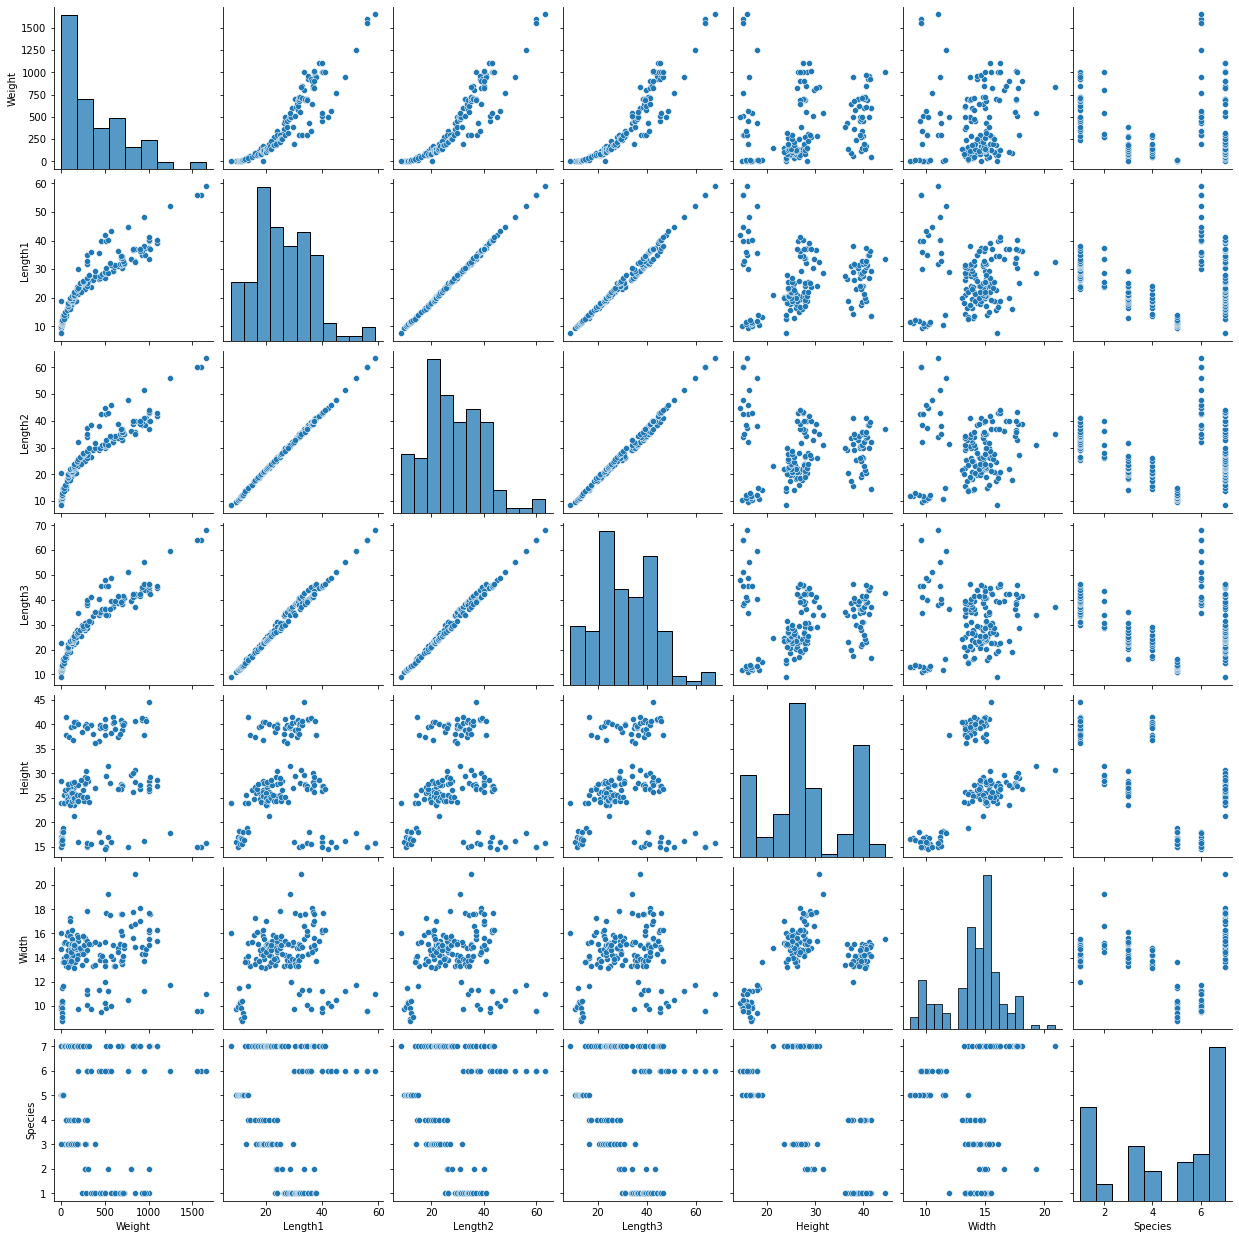

In [123]:
import seaborn as sns
sns.pairplot(samples)

In [124]:
samples.drop('Species', axis=1, inplace=False).corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.916436,0.919370,0.924470,0.193483,0.133141
Length1,0.916436,1.000000,0.999517,0.992146,0.035006,0.030553
Length2,0.919370,0.999517,1.000000,0.994209,0.054578,0.042976
Length3,0.924470,0.992146,0.994209,1.000000,0.132341,0.036488
Height,0.193483,0.035006,0.054578,0.132341,1.000000,0.455997
Width,0.133141,0.030553,0.042976,0.036488,0.455997,1.000000


In [125]:
pca = PCA()
pca.fit(scale(samples.drop('Species', axis=1, inplace=False)))

PCA()

<BarContainer object of 6 artists>

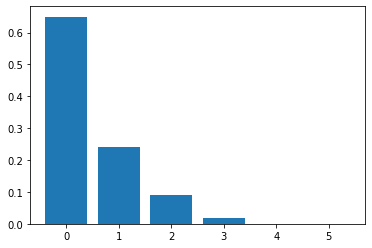

In [126]:
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)

<BarContainer object of 6 artists>

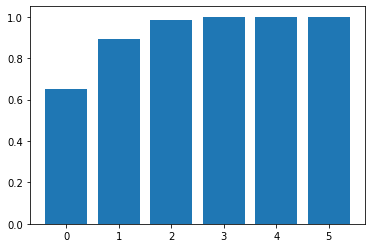

In [127]:
plt.bar(range(pca.n_components_), np.cumsum(pca.explained_variance_ratio_))

Interpretacja znaczenia komponentów PCA

In [128]:
print(samples.columns[:-1])

components = pd.DataFrame(pca.components_, columns=samples.columns[:-1])
components

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')


,Weight,Length1,Length2,Length3,Height,Width
0,0.485710,0.500427,0.501630,0.502815,0.079382,0.053867
1,-0.042965,0.097843,0.082385,0.047302,-0.698000,-0.701678
2,-0.021484,0.061341,0.052074,-0.057669,-0.699242,0.707671
3,-0.872794,0.269499,0.274170,0.281231,0.095462,0.047210
4,-0.002724,0.497183,0.304561,-0.806202,0.091884,-0.040497
5,-0.001503,0.645303,-0.755607,0.112080,0.000080,0.008833


Interpretacja:
* PC0 - pierwsze 4 zmienne wykazują się silną korelacją i model zrzutował je na jeden wymiar
* PC1 - ostatnie dwie zmienne zostały zrzutowane na drugi wymiar
* PC2 - ostatnie dwie zmienne zostały zróżnicowane poprzez znak 
* PC3 - rozróżnienie wagi od długości w pierwszsych 4 zmiennych
* PC4 PC5 nie przenoszą zadnej wariancji, nie ma sensu ich interpretować

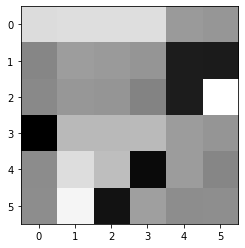

In [129]:
plt.imshow(components, cmap='gray')

In [130]:
pca = PCA(2)
z = pca.fit_transform(scale(samples.drop('Species', axis=1, inplace=False)))

LinAlgError: SVD did not converge

In [ ]:
plt.scatter(z[:, 0], z[:, 1], c=samples.iloc[:, -1])

### Zadanie:

Na podstawie danych food, określić podobieństwo między zwyczajami jedzeniowymi mieszkańców krajów Wielkiej Brytanii.

http://www.dsc.ufcg.edu.br/~hmg/disciplinas/posgraduacao/rn-copin-2014.3/material/SignalProcPCA.pdf

Przygotowanie danych wspólnie - model i interpretacja - zadanie samodzielne.

In [ ]:
import pandas as pd
food = pd.read_csv("Dane/food.txt",delimiter=" ",comment="#")
food.head()

In [ ]:
dataset = food.T.iloc[1:, :]
dataset

In [ ]:
pca = PCA()
pca.fit(scale(dataset))

In [ ]:
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)

In [ ]:
pca_features = pca.transform(scale(dataset))

plt.scatter(pca_features[:, 0], pca_features[:, 1])

for i in range(4):
    plt.annotate(s=food.columns[i+1], xy=(pca_features[i, 0], pca_features[i, 1]))

In [ ]:
plt.figure(figsize=(16, 5))
plt.bar(food['food'], pca.components_[0, :], alpha=0.5, label='PC0')
plt.bar(food['food'], pca.components_[1, :], alpha=0.5, label='PC1')
plt.legend()
plt.xticks(rotation=60)

## TODO zintepretować składowe

## Zadanie 2: przeanalizować charakterystyki miast przy użyciu PCA - zinterpretować składowe

In [ ]:
miasta = pd.read_csv("Dane/Miasta.txt",sep="\t+")
miasta.head()

In [ ]:
pca = PCA()
pca.fit(scale(miasta))
pca.explained_variance_ratio_

In [ ]:
pca_features = pca.transform(scale(miasta))

plt.figure(figsize=(16, 10))
plt.scatter(pca_features[:, 0], pca_features[:, 1])

for i in range(miasta.shape[0]):
    plt.annotate(s=miasta.index[i], xy=(pca_features[i, 0], pca_features[i, 1]))

In [ ]:
plt.bar(miasta.columns, pca.components_[0, :], alpha=0.5, label='PC0')
plt.bar(miasta.columns, pca.components_[1, :], alpha=0.5, label='PC1')
plt.legend()
plt.xticks(rotation=60)

### Zadanie 

Inne miasta - przeanalizować miasta przy użyciu PCA: ile głównych składowych, zinterpretować je, zidentyfikować wyróżniające się miasta


2. http://www.stat.nthu.edu.tw/~swcheng/Teaching/stat5191/assignment/assignment2.html

In [ ]:
dane = pd.read_csv("Dane/places.txt",sep="\s+",header=0)
dane = dane.iloc[:,range(9)]
dane.head()

In [ ]:
pca = PCA()
pca.fit(scale(dane))
pca.explained_variance_ratio_

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

In [ ]:
plt.bar(dane.columns, pca.components_[0, :], alpha=0.5, label='PC0')
plt.bar(dane.columns, pca.components_[1, :], alpha=0.5, label='PC1')
plt.bar(dane.columns, pca.components_[2, :], alpha=0.5, label='PC2')
plt.bar(dane.columns, pca.components_[3, :], alpha=0.5, label='PC3')
plt.legend()
plt.xticks(rotation=60)

## TODO interpretacja 4 głównych składowych

In [ ]:
pca_features = pca.transform(scale(dane))

plt.figure(figsize=(16, 10))
plt.scatter(pca_features[:, 0], pca_features[:, 1])

r = 3.5
for i in range(dane.shape[0]):
    if pca_features[i, 0]**2 + pca_features[i, 1]**2 > r**2:
        plt.annotate(s=dane.index[i], xy=(pca_features[i, 0], pca_features[i, 1]))

In [ ]:
plt.bar(dane.columns, pca.components_[0, :], alpha=0.5, label='PC0')
plt.bar(dane.columns, pca.components_[1, :], alpha=0.5, label='PC1')
plt.legend()
plt.xticks(rotation=60)

## Zastosowanie PCA do redukcji wymiaru dla regresji liniowej

*Ciekawostka: połączenie regresji liniowej z PCA jest nazywane PCR*

 Dane longley: https://www.datarobot.com/blog/ordinary-least-squares-in-python/

In [ ]:
import pandas as pd
df = pd.read_csv('Dane/longley.csv', index_col=0)
df.head()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
X = scale(df.iloc[:, :-1])
y = scale(df.iloc[:, -1])

In [ ]:
lm = LinearRegression()
np.mean(cross_val_score(lm, X, y, scoring='neg_mean_squared_error', cv=5))

In [ ]:
pca = PCA()
pca.fit(X)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca = PCA(3)
pca_features = pca.fit_transform(X)

In [ ]:
lm = LinearRegression()
np.mean(cross_val_score(lm, pca_features, y, scoring='neg_mean_squared_error', cv=5))

Wniosek: PCA pomogło zmniejszyć wartość MSE z 0.23 do 0.15 poprzez połączenie liniowe skorelowanych zmiennych i wyreprezentowanie ich w 3 wymiarach zamiast 6.

### Zadanie

Użyć PCA do redukcji wymiaru dla modelu regresji na danych yarn (p>n) i porównać z regresją lasso.

In [ ]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning, ConvergenceWarning
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.simplefilter('ignore', FutureWarning)

In [ ]:
import pandas as pd

df = pd.read_csv("Dane/yarn.txt",sep=" ",index_col=0)
print(df.shape)
df.head().iloc[:,-5:]

In [ ]:
X = df.iloc[:, :-2]
y = df.iloc[:, -2]

In [ ]:
X.shape, y.shape

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso

Wariant 1 - PCA + LinearRegression

In [ ]:
pipeline = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('pca', PCA()),
    ('lm', LinearRegression())
])

param_grid = {
    'pca__n_components': range(3, 18)
}

gs = GridSearchCV(pipeline, 
                 param_grid=param_grid,
                 scoring='neg_mean_squared_error',
                 cv=KFold(3))
gs.fit(X, y)

In [ ]:
plt.plot(range(3, 18), -gs.cv_results_['mean_test_score'])
plt.title('MSE')
plt.xlabel('PCA components')

In [ ]:
min(-gs.cv_results_['mean_test_score'])

Wariant 2 - Lasso

In [ ]:
pipeline = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('lm', Lasso())
])

param_grid = {
    'lm__alpha': np.linspace(start=0.001, stop=2, num = 100)
}

gs = GridSearchCV(pipeline, 
                 param_grid=param_grid,
                 scoring='neg_mean_squared_error',
                 cv=KFold(3))
gs.fit(X, y)

In [ ]:
plt.plot(np.linspace(start=0.001, stop=2, num = 100), -gs.cv_results_['mean_test_score'])
plt.title('MSE')
plt.xlabel('Lasso alpha regularization')

In [ ]:
min(-gs.cv_results_['mean_test_score'])

### Zadanie domowe

Zadanie klasyfikacji "spam or ham"z pierwszych zajęć - przetestować pipeline z uwzględnieniem redukcji wymiaru przy użyciu SVD.

### Źródła i materiały


http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py


http://www.ams.org/samplings/feature-column/fcarc-svd

https://bugra.github.io/work/notes/2014-11-16/an-introduction-to-unsupervised-learning-scikit-learn/

https://alyssaq.github.io/2015/singular-value-decomposition-visualisation/
 
Przykład obrazujący dlaczego PCA może zaszkodzić:

https://blog.drskippy.com/2012/05/14/dimension-reduction-for-machine-learning-simple-example-of-svd-pca-pathology/